In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

In [2]:
def showImg(img, colored=False, showAxis=False):
    plt.figure(figsize=(20,20))
    if not showAxis:
        plt.axis("off")
    if (len(img.shape) == 3):
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    elif(colored):
        plt.imshow(img)
    else:
        plt.imshow(img, 'gray')

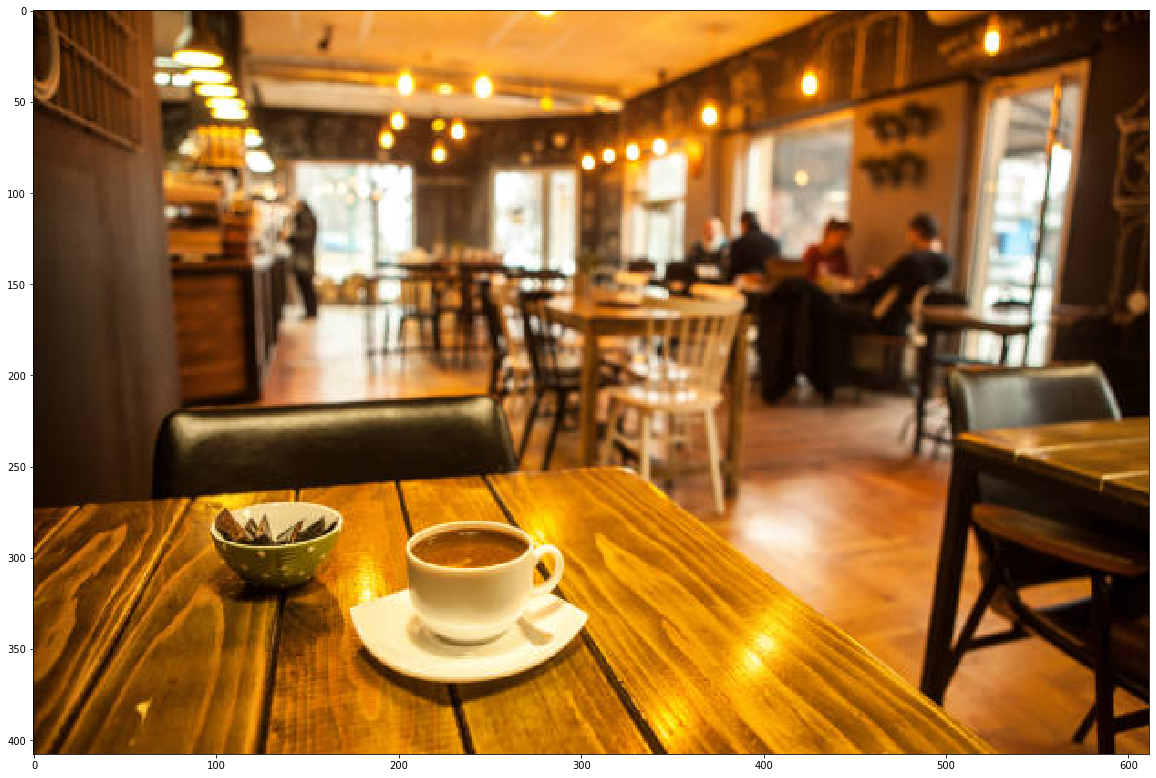

In [3]:
img = cv2.imread('./data/coffee.jpg')
showImg(img, showAxis=True)

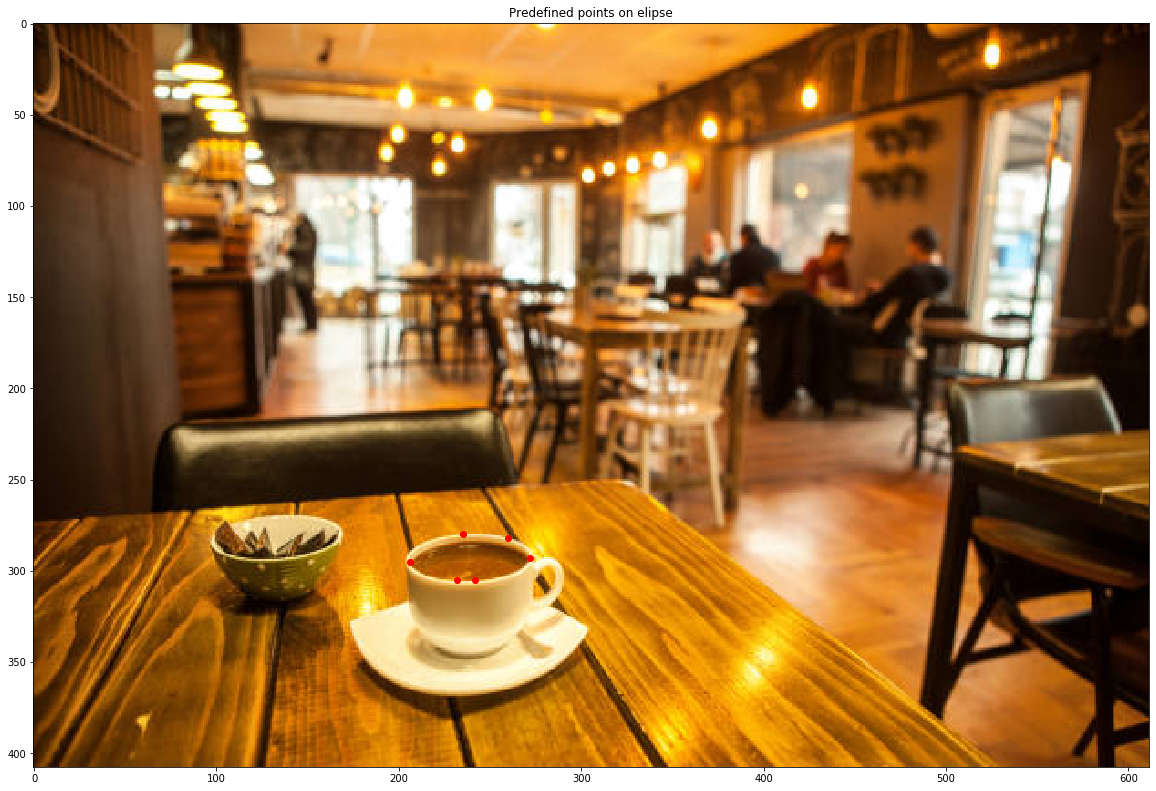

In [4]:
points = np.array([
    [242, 305],
    [232, 305],
    [206, 295],
    [272, 293],
    [235, 280],
    [260, 282],
])

plt.figure(figsize=(20,20))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Predefined points on elipse")
plt.plot(points[:,0], points[:,1], 'ro');

In [5]:
def drawElips(img, H):
    for radius in range(0,360):
        # circles
        from_m = [[math.sin(math.pi*radius/180)], [math.cos(math.pi*radius/180)], [1]]
        to_m = [[math.sin(math.pi*(radius+1)/180)], [math.cos(math.pi*(radius+1)/180)], [1]]
        # calculate points on elips
        from_p = H @ from_m
        to_p = H @ to_m
        # normalize
        from_p = (from_p/from_p[2])
        to_p = (to_p/to_p[2])
        # draw line on image
        cv2.line(img, (from_p[0],from_p[1]),(to_p[0],to_p[1]),(0,0,255), 2)

def findElips(img, points):
    m = np.empty((len(points),5))
    m[:,0] = 2 * points[:,0] * points[:,1]
    m[:,1] = points[:,1] ** 2
    m[:,2] = 2 * points[:,0]
    m[:,3] = 2 * points[:,1]
    m[:,4] = 1
    r = points[:,0] ** 2
    par = -1 * (np.linalg.inv(m.T @ m) @ m.T) @ r
    E = np.array(
          [[1,par[0],par[2]],
          [par[0],par[1],par[3]],
          [par[2],par[3],par[4]]],
    )
    U, S, _ = np.linalg.svd(E)
    H_inv_t = U @ np.diag(np.sqrt(S))
    H = np.linalg.inv( H_inv_t.T )
    
    # construct new image with elips drawen
    res_img = img.copy()
    drawElips(res_img, H)
    return res_img

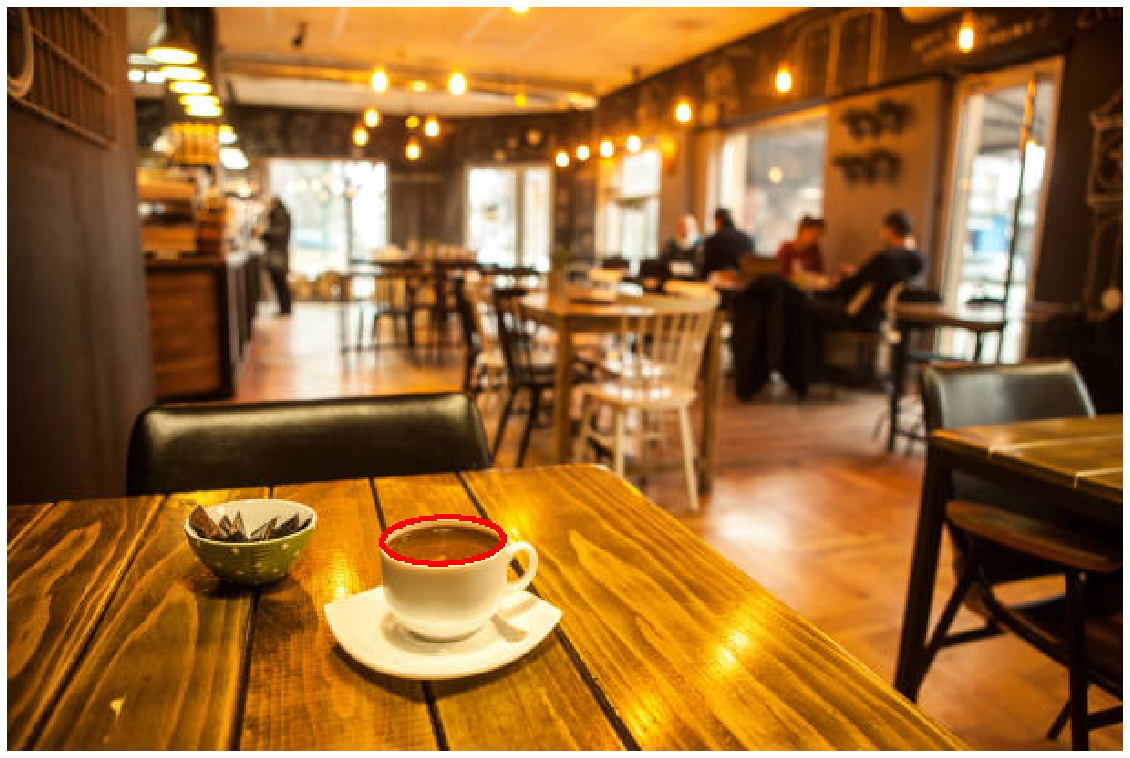

In [6]:
res = findElips(img, points)
showImg(res)